In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('1.04.+Real-life+example.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [52]:
df.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [53]:
df = df.drop(['Model', 'Brand'], axis = 1)

In [54]:
df.isnull().sum()

Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [55]:
df_mv = df.dropna(axis = 0) # thumb rule 5% missing value dirrectly can be removed by removing minssing rows

In [56]:
df_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [57]:
df_mv.isnull().sum()

Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


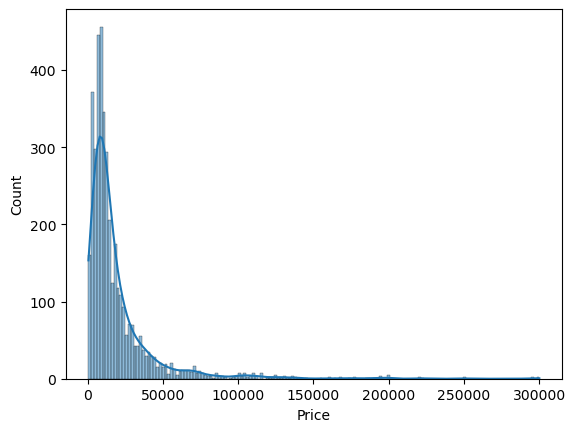

In [58]:
sns.histplot(df_mv['Price'], kde = True)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


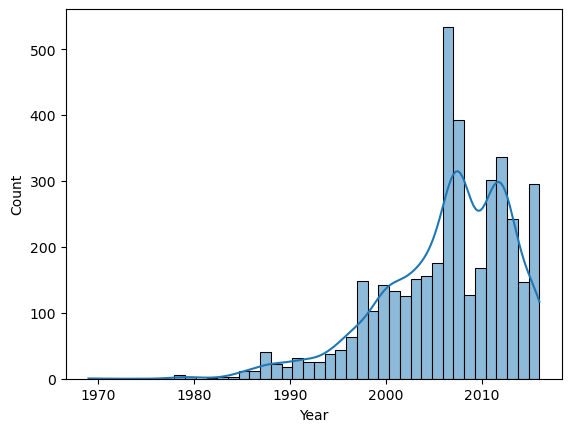

In [59]:
sns.histplot(df_mv['Year'], kde = True)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


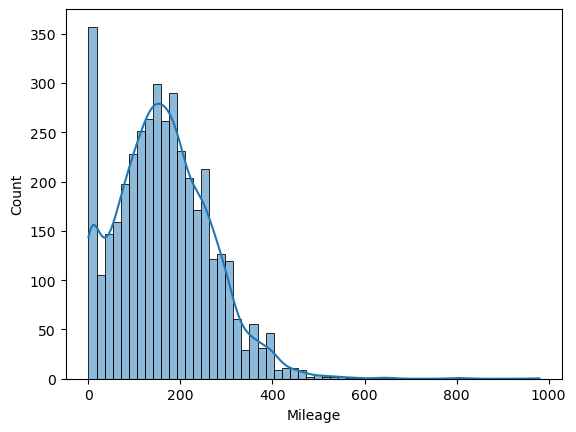

In [60]:
sns.histplot(df_mv['Mileage'], kde = True)
plt.show()

In [61]:
## remove outlier from the dataset

In [62]:
q = df_mv['Price'].quantile(0.99)     # Get 99th percentile
df_q = df_mv[df_mv['Price'] < q]      # Filter values below that
df_q.describe(include = 'all')              # Show numeric summary


,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,NaN,6,NaN,NaN,4,2,NaN
top,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,NaN,1528,NaN,NaN,1853,3613,NaN
mean,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


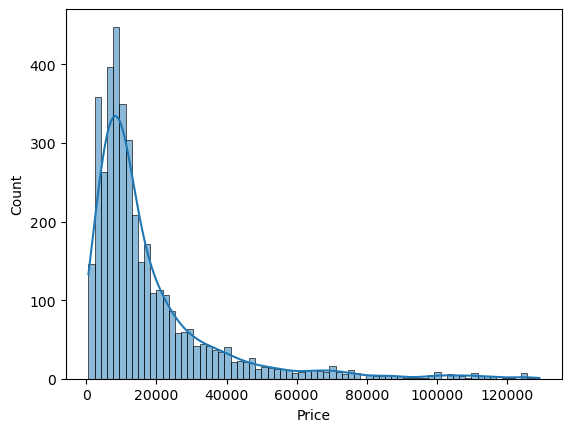

In [63]:
sns.histplot(df_q['Price'], kde = True)
plt.show()

In [64]:
q = df_mv['Year'].quantile(0.01)
df_2 = df_q[df_q['Year'] > q]


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


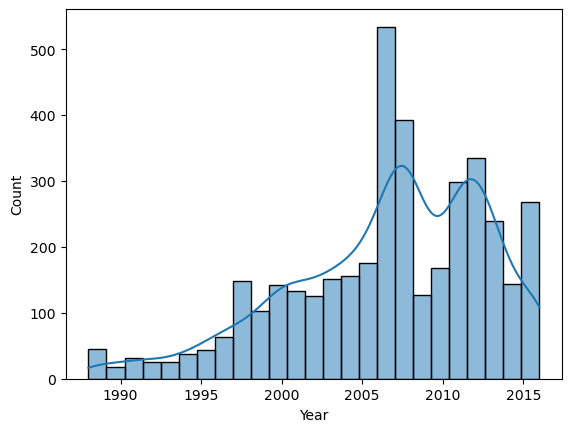

In [65]:
sns.histplot(df_2['Year'], kde = True)
plt.show()

In [66]:
q = df_2['Mileage'].quantile(0.99)
df_3 = df_2[df_2['Mileage'] < q]

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


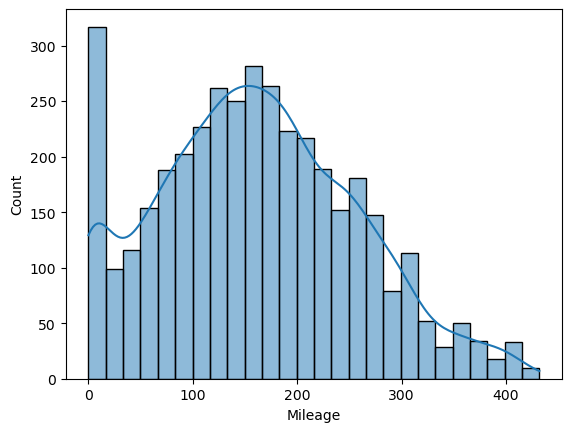

In [67]:
sns.histplot(df_3['Mileage'], kde = True)
plt.show()

In [68]:
df_4 = df_3[df_3["EngineV"] < 6.5]


C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


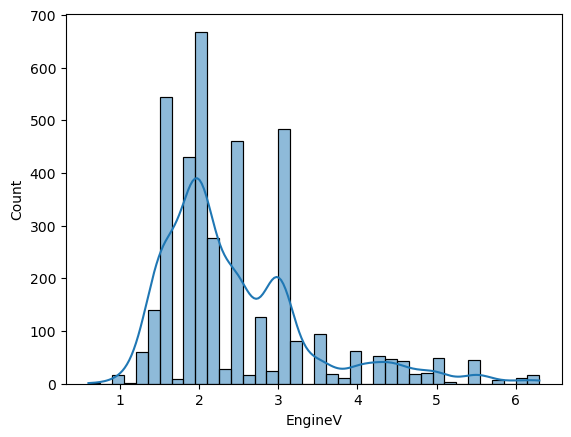

In [69]:
sns.histplot(df_4['EngineV'], kde = True)
plt.show()

In [70]:
df_cleaned = df_4.reset_index(drop = True)

In [71]:
df_cleaned.describe(include = 'all')

,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3865.000000,3865,3865.000000,3865.000000,3865,3865,3865.000000
unique,NaN,6,NaN,NaN,4,2,NaN
top,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,NaN,1466,NaN,NaN,1806,3504,NaN
mean,18201.438580,NaN,160.401035,2.450259,NaN,NaN,2006.716171
std,19088.279971,NaN,95.455403,0.949535,NaN,NaN,6.099113
min,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


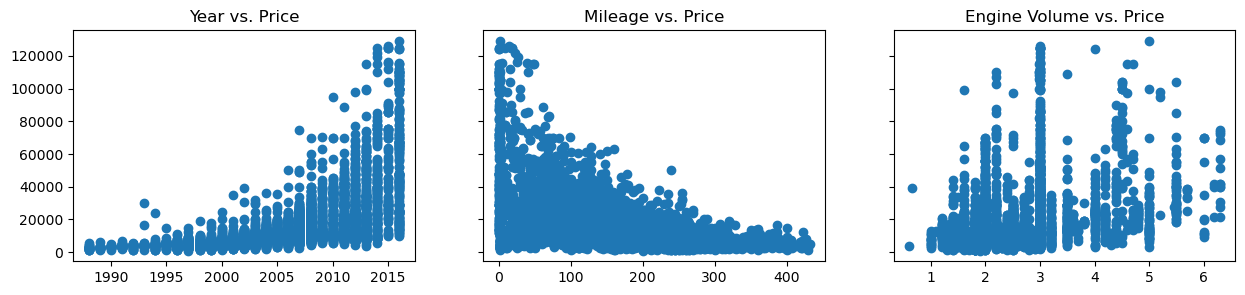

In [72]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(df_cleaned["Year"], df_cleaned["Price"])
ax1.set_title("Year vs. Price")

ax2.scatter(df_cleaned["Mileage"], df_cleaned["Price"])
ax2.set_title("Mileage vs. Price")

ax3.scatter(df_cleaned["EngineV"], df_cleaned["Price"])
ax3.set_title("Engine Volume vs. Price")

plt.show()

In [73]:
log_price = np.log(df_cleaned["Price"])
df_cleaned['log_price'] = log_price
df_cleaned

,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3860,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3861,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3862,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3863,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


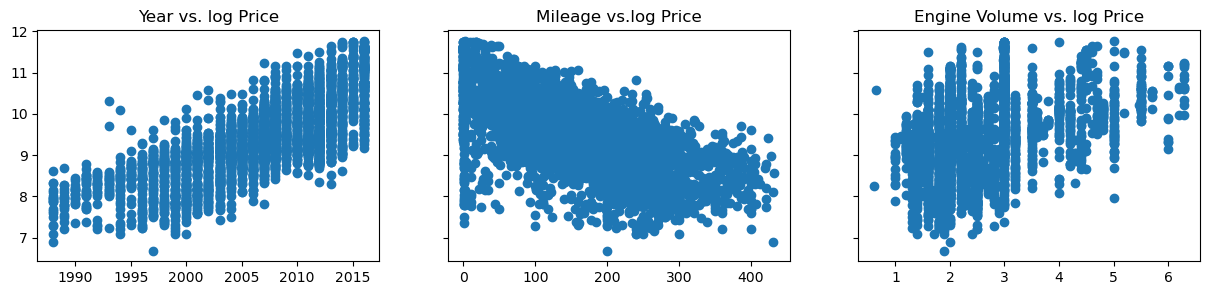

In [74]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15, 3))

ax1.scatter(df_cleaned["Year"], df_cleaned["log_price"])
ax1.set_title("Year vs. log Price")

ax2.scatter(df_cleaned["Mileage"], df_cleaned["log_price"])
ax2.set_title("Mileage vs.log Price")

ax3.scatter(df_cleaned["EngineV"], df_cleaned["log_price"])
ax3.set_title("Engine Volume vs. log Price")

plt.show()

In [75]:
df_cleaned = df_cleaned.drop(columns = ['Price'])

In [76]:
df_cleaned.columns.values

array(['Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'], dtype=object)

In [77]:
# checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric independent variables
variables = df_cleaned[['Year', 'Mileage', 'EngineV']]  

# Create VIF DataFrame
vif = pd.DataFrame()
vif["Feature"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

print(vif)


   Feature        VIF
0     Year  10.361600
1  Mileage   3.797050
2  EngineV   7.658673


In [78]:
df_no_multicollinearity = df_cleaned.drop(columns=['Year'])


In [79]:
df_no_multicollinearity

,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,sedan,277,2.0,Petrol,yes,8.342840
1,van,427,2.9,Diesel,yes,8.974618
2,sedan,358,5.0,Gas,yes,9.495519
3,crossover,240,4.2,Petrol,yes,10.043249
4,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...
3860,van,163,2.5,Diesel,yes,9.350102
3861,sedan,35,1.6,Petrol,yes,9.792556
3862,sedan,9,3.0,Diesel,yes,11.736069
3863,sedan,1,3.5,Petrol,yes,8.779557


In [80]:
df_with_dummies = pd.get_dummies(df_no_multicollinearity, drop_first = True, dtype = int)

In [81]:
df_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [84]:
cols = ['log_price', 'Mileage', 'EngineV', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [85]:
df_preprocessing = df_with_dummies[cols]
df_preprocessing

,log_price,Mileage,EngineV,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3860,9.350102,163,2.5,0,0,0,0,1,0,0,0,1
3861,9.792556,35,1.6,0,0,1,0,0,0,0,1,1
3862,11.736069,9,3.0,0,0,1,0,0,0,0,0,1
3863,8.779557,1,3.5,0,0,1,0,0,0,0,1,1


In [86]:
target = df_preprocessing['log_price']
inputs = df_preprocessing.drop(['log_price'], axis = 1)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

StandardScaler()

In [88]:
input_scaled = scaler.transform(inputs)

In [89]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(input_scaled, target, test_size = 0.2, random_state = 42)

In [90]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [91]:
y_hat = reg.predict(x_train)

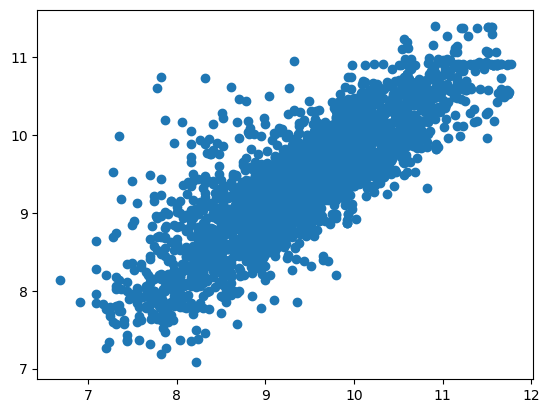

In [92]:
plt.scatter(y_train, y_hat)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Residual PDF')

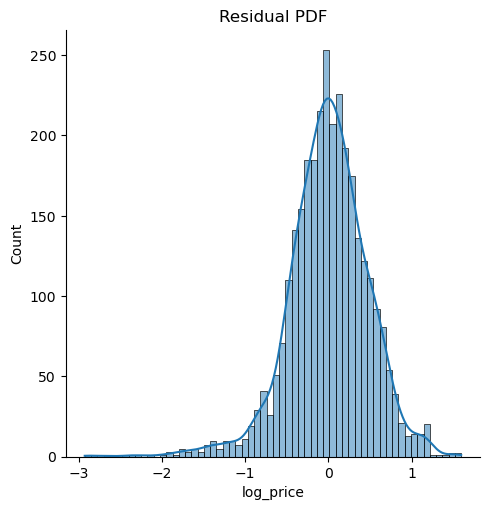

In [93]:
sns.displot(y_train - y_hat, kde = True)
plt.title('Residual PDF')

In [94]:
reg.score(x_train, y_train)

0.7038174844057813

In [95]:
reg.intercept_

9.415773990275284

In [96]:
reg.coef_

array([-0.44426048,  0.30101672, -0.13385387, -0.0833043 , -0.14398108,
       -0.12223953, -0.17334723, -0.15741025, -0.03762755, -0.1589722 ,
        0.29716833])

In [97]:
reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['weights'] = c=reg.coef_
reg_summary

,Features,weights
0,Mileage,-0.444260
1,EngineV,0.301017
2,Body_hatch,-0.133854
3,Body_other,-0.083304
4,Body_sedan,-0.143981
5,Body_vagon,-0.122240
6,Body_van,-0.173347
7,Engine Type_Gas,-0.157410
8,Engine Type_Other,-0.037628
9,Engine Type_Petrol,-0.158972


In [98]:
y_hat_test = reg.predict(x_test)

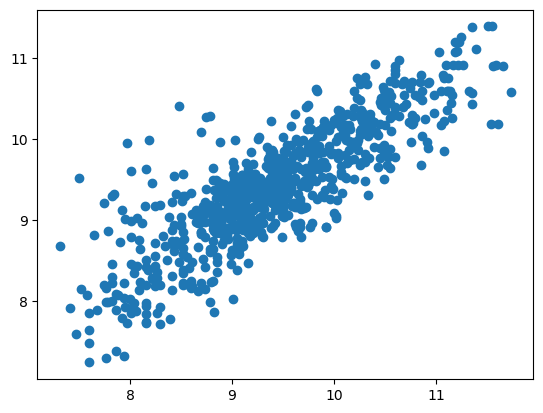

In [99]:
plt.scatter(y_test, y_hat_test)
plt.show()

In [100]:
import statsmodels.api as sm
x0 = sm.add_constant(inputs)
result1 = sm.OLS(target, x0).fit()
result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     840.5
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        16:51:52   Log-Likelihood:                -2609.4
No. Observations:                3865   AIC:                             5243.
Df Residuals:                    3853   BIC:                             5318.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  8.9453      0.044    202.114      0.000       8.859       9.032
Mileage               -0.0046   8.92e-05    -51.475      0.000      -0.005      -0.004
EngineV                0.3145      0.009     34.126      0.000       0.296       0.333
Body_hatch            -0.5451      0.038    -14.303      0.000      -0.620      -0.470
Body_other            -0.2896      0.031     -9.312      0.000      -0.351      -0.229
Body_sedan            -0.3111      0.023    -13.365      0.000      -0.357      -0.265
Body_vagon            -0.4313      0.033    -13.065      0.000      -0.496      -0.367
Body_van              -0.4944      0.030    -16.644      0.000      -0.553      -0.436
Engine Type_Gas       -0.4393      0.025    -17.784      0.000      -0.488      -0.391
Engine Type_Other     -0.2095      0.050     -4.220      0.000      -0.307      -0.112
Engine Type_Petrol    -0.3329      0.020    -16.944      0.000      -0.371      -0.294
Registration_yes       1.0229      0.028     36.193      0.000       0.967       1.078
==============================================================================
Omnibus:                      431.072   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1194.400
Skew:                          -0.610   Prob(JB):                    4.36e-260
Kurtosis:                       5.435   Cond. No.                     1.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""